# Assignment 1: Central Limit Theorem

The objective of this practice is to calculate the probability distribution, average value and variance
of the problem of throwing dice multiple times and calculating the distribution of the outcomes.

In this problem, $N_{dice}$ are thrown $N_{iter}$ times.

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Function definitions

In [2]:
def uniformDistribution(n,a=0,b=1):
    # This function is used to obtain the result of throwing a dice

    # Random number between [a,b] according to uniform distribution
    x = np.random.uniform(a,b)

    # Find in which of the n intervals the number is found (for a dice n=6)
    l = 0
    r = n-1

    # Binary search (we could check each interval with a loop, but this is faster)
    while l <= r:
        m = (l+r)//2
        interval = a + (b-a)*(m+1)/n

        if x < interval:
            r = m - 1
        else:
            l = m + 1
    return r + 2

def rollKDiceN(k,N):
    # Roll k dice N times and save the results

    # The list of possible outcomes 
    # (if you throw k dice, you have 5k+1 possible outcomes)
    res = np.zeros(5*k+1)

    # Loop of N_iter iterations
    for _ in np.arange(N):
        dumm = 0
        for _ in np.arange(k):
            dumm += uniformDistribution(6)
        # We add 1 to the resulting outcome
        res[dumm-k] += 1
    return res

def normalDistribution(x,mu,sigma):
    # A simple definition of a normal distribution of mean = mu, and standard deviation = sigma
    return np.exp(-(x-mu)**2/(2*sigma))/np.sqrt(2*np.pi*sigma)

## First Task:

Use a random number generator to simulate dice throwing and calculate the resulting probability distribution $p_i$ of obtaining each
number from 1 to 6. Generate $N_{iter}$ random numbers and calculate the mean $\mu$
$$
    \mu = \langle x\rangle = \frac{1}{6}\sum_{i=1}^6x_i
$$
and variance $\sigma$
$$
    \sigma^2 = \langle x^2\rangle - \langle x\rangle^2
$$
where
$$
    \langle x^2\rangle = \frac{1}{6}\sum_{i=1}^6x^2_i
$$

Plot the resulting probability distribution function and compare it with a uniform distribution function.

Probability distribution: [0.16662 0.16777 0.16495 0.16826 0.16717 0.16523]
Exact mean: 3.5, estimated mean: 3.49728
Exact standard deviation: 1.707825127659933, estimated standard deviation: 1.7061572616848668


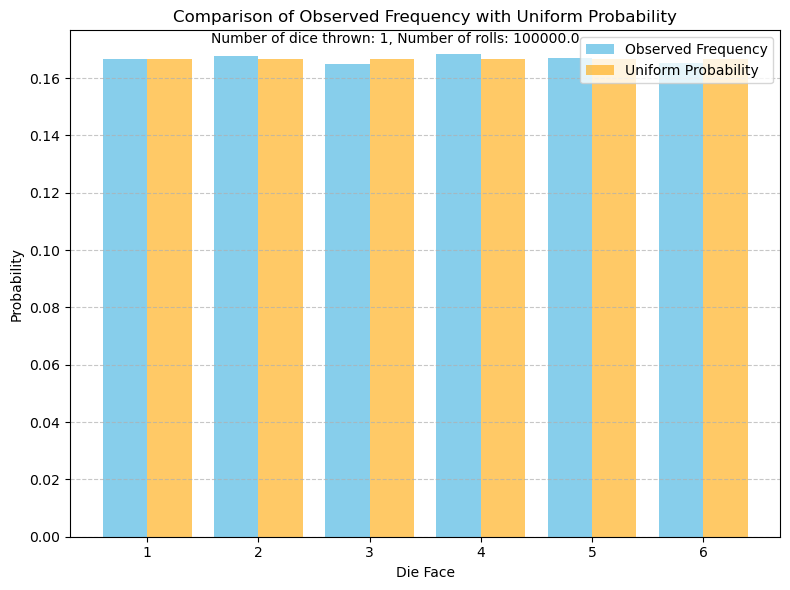

In [3]:
# Fix the seed
np.random.seed(42)

# We throw 1 die 100000 times
N      = 1e5
k      = 1

# Normalized probability distribution
counts = rollKDiceN(k,N)/N
nums   = np.arange(5*k+1) + k

# Mean and standard deviation of the outcomes
mean = np.sum(nums*counts)/k
std = np.sqrt(np.sum(nums**2*counts)/k - mean**2)

# Exact values of the mean and standard deviation
mu = np.sum(np.arange(6)+1)/6
sigma = np.sqrt(np.sum((np.arange(6)+1)**2)/6 - mu**2)

print(f'Probability distribution: {counts}')
print(f'Exact mean: {mu}, estimated mean: {mean}')
print(f'Exact standard deviation: {sigma}, estimated standard deviation: {std}')

# Plotting the results and comparing with a unifrom distribution
plt.figure(figsize=(8, 6))
plt.bar(nums - 0.2, counts, width=0.4, label='Observed Frequency', color='skyblue')
plt.bar(nums + 0.2, np.ones(6)/6, width=0.4, label='Uniform Probability', color='orange', alpha=0.6)
plt.xlabel('Die Face')
plt.ylabel('Probability')
plt.title('Comparison of Observed Frequency with Uniform Probability')
plt.xticks(nums)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
subtitle_text = f"Number of dice thrown: {k}, Number of rolls: {N}"
plt.figtext(0.5, 0.92, subtitle_text, fontsize=10, ha='center')
plt.tight_layout()
plt.savefig('Ex1.1.png')
plt.show()

## Second task:

Now assume that one random event consists in throwing two dice, $N_{dice} = 2$, and calculating the average value,
$$
    x_i = \frac{\text{rand}(6)+\text{rand}(6)}{2}
$$
Calculate the probability distribution of the outcome $x = (1,1.5,2,2.5,\ldots,6)$ and show it on a figure.

Probability distribution: [0.02718 0.05491 0.08417 0.11108 0.13821 0.16579 0.13892 0.11148 0.08431
 0.05573 0.02822]
Exact mean: 3.499999999999999, estimated mean: 3.505205
Exact standard deviation: 1.2076147288491224, estimated standard deviation: 1.2081826881622653


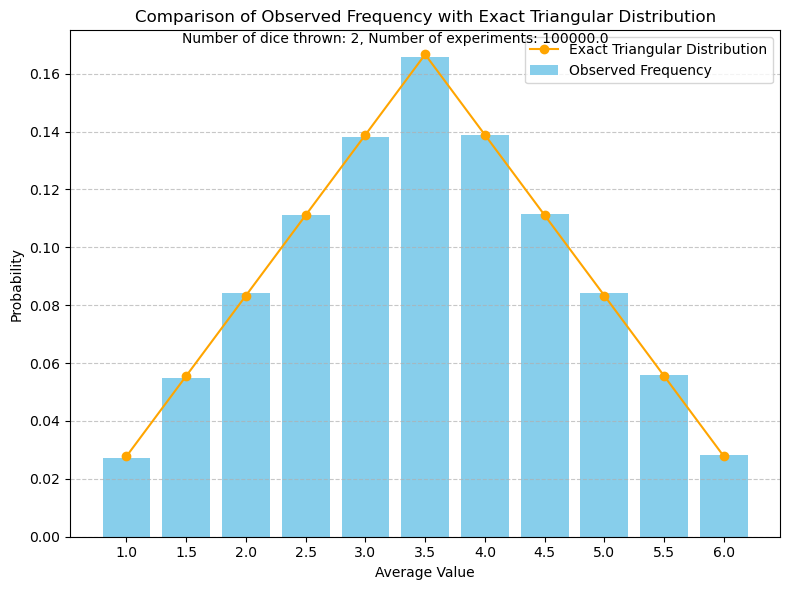

In [4]:
# We throw 2 dice 100000 times
N      = 1e5
k      = 2

# Normalized probability distribution
counts = rollKDiceN(k,N)/N
nums   = (np.arange(5*k+1) + k)/k

# Mean and standard deviation of the outcomes
mean = np.sum(nums*counts)
std = np.sqrt(np.sum(nums**2*counts) - mean**2)

# Exact values of the mean and standard deviation
probs = np.array([1,2,3,4,5,6,5,4,3,2,1])/36
mu = np.sum(probs*(np.arange(11)+2)/2)
sigma = np.sqrt(np.sum(probs*((np.arange(11)+2)/2)**2) - mu**2)

print(f'Probability distribution: {counts}')
print(f'Exact mean: {mu}, estimated mean: {mean}')
print(f'Exact standard deviation: {sigma}, estimated standard deviation: {std}')

# Plotting the results and comparing with a unifrom distribution
plt.figure(figsize=(8, 6))
plt.bar(nums, counts, width=0.4, label='Observed Frequency', color='skyblue')
plt.plot(nums, probs, marker='o', linestyle='-', color='orange', label='Exact Triangular Distribution')
plt.xlabel('Average Value')
plt.ylabel('Probability')
plt.title('Comparison of Observed Frequency with Exact Triangular Distribution')
plt.xticks(nums)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding subtitle
subtitle_text = f"Number of dice thrown: {k}, Number of experiments: {N}"
plt.figtext(0.5, 0.92, subtitle_text, fontsize=10, ha='center')
plt.tight_layout()
plt.savefig('Ex1.2.png')
plt.show()

## Third task:

Consider now the more general case where we throw $N_{dice}$ and calculate the average value
$$
    x = \frac{\sum_{i=1}^{N_{dice}}\text{rand}(6)}{N_{dice}}
$$
Calculate the probability distribution $p(x)$ and assume that for large $N_{dice}$, the spacing $dx = 1/N_{dice}$ between two consecutive
values of $x$ is small. Namely that the random variable $x$ can be considered a continuous variable, so its normalization condition is
$$
    \int p(x)dx = 1
$$
Compare this result with the prediction of the \textbf{Central Limit Theorem}
$$
    g(x) = \frac{1}{\sqrt{2\pi}\sigma'}e^{-\frac{(x-\mu)^2}{2\sigma'^2}}
$$
where the reduced variance is given by $\sigma' = \sigma/\sqrt{N_{dice}}$.

We will consider that $N_{dice} = 6$ is a sufficiently large number so that the theorem applies.

Probability distribution: [1.2000e-04 5.4000e-04 2.2200e-03 7.3800e-03 1.6020e-02 3.1560e-02
 5.7420e-02 9.5940e-02 1.4940e-01 2.1534e-01 2.8758e-01 3.6984e-01
 4.4760e-01 4.9770e-01 5.4690e-01 5.5800e-01 5.4894e-01 4.9974e-01
 4.4100e-01 3.6624e-01 2.8458e-01 2.1288e-01 1.4814e-01 9.1620e-02
 6.1680e-02 3.2760e-02 1.7700e-02 7.0800e-03 2.8800e-03 1.0800e-03
 1.2000e-04]
Exact mean: 3.5, estimated mean: 3.4994483333333335
Exact standard deviation: 0.6972166887783962, estimated standard deviation: 0.6960148275060907


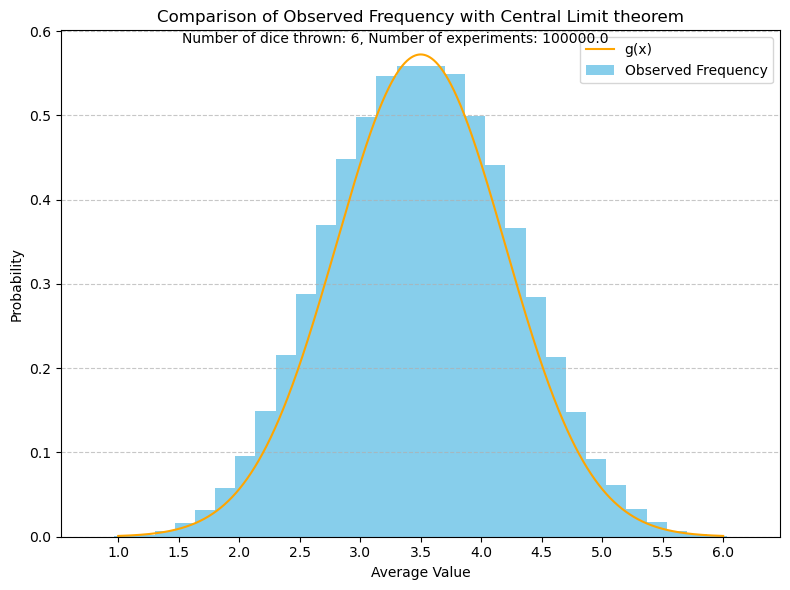

In [7]:
# We throw 6 dice 100000 times
N      = 1e5
k      = 6

# Normalized probability distribution
counts = rollKDiceN(k,N)/N
nums   = (np.arange(5*k+1) + k)/k

# Re-normalize probability by the spacing dx = 1/N_dice
counts *= k

# Mean and standard deviation of the outcomes
mean = np.sum(nums*counts)/k
std = np.sqrt(np.sum(nums**2*counts)/k - mean**2)

# Exact values of the mean and standard deviation
mu = np.sum(np.arange(6)+1)/6
var = (np.sum((np.arange(6)+1)**2)/6 - mu**2)/k
sigma = np.sqrt(var)
x = np.linspace(1,6,int(N))

print(f'Probability distribution: {counts}')
print(f'Exact mean: {mu}, estimated mean: {mean}')
print(f'Exact standard deviation: {sigma}, estimated standard deviation: {std}')

# Plotting the results and comparing with a unifrom distribution
plt.figure(figsize=(8, 6))
plt.bar(nums, counts, width=0.4, label='Observed Frequency', color='skyblue')
plt.plot(x, normalDistribution(x,mu,var), color='orange', label='g(x)')
plt.xlabel('Average Value')
plt.ylabel('Probability')
plt.title('Comparison of Observed Frequency with Central Limit theorem')
plt.xticks((np.arange(11)+2)/2)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding subtitle
subtitle_text = f"Number of dice thrown: {k}, Number of experiments: {N}"
plt.figtext(0.5, 0.92, subtitle_text, fontsize=10, ha='center')
plt.tight_layout()
plt.savefig('Ex1.3.png')
plt.show()

## Fourth Task:

Finally, we are asked to calculate the average value and to estimate the statistical error, associated with such an estimation. Let us assume that we throw a single die to estimate the mean value
$$
    \mu = \langle x\rangle \approx\frac{\sum_{i=1}^{N_{iter}}x_i}{N_{iter}}
$$
and the variance
$$
    \sigma^2 = \langle x^2\rangle - \langle x\rangle^2 \approx \frac{\sum_{i=1}^{N_{iter}}x^2_i}{N_{iter}}-\biggl(\frac{\sum_{i=1}^{N_{iter}}x_i}{N_{iter}}\biggr)^2
$$
Then, calculate this mean value by throwing the die $N_{iter} = 10$ and $N_{iter}=100$ times and estimate the statistical error by $\varepsilon=\sigma/\sqrt{N_{iter}}$ where the variance is an estimation of the statistical error, i.e., the difference between $\mu(N_{iter})$ and the exact value of $\mu$.

In [8]:
# We throw 1 die 10 and 100 times
N_list = [10,100]
k      = 1

# Exact values of the mean and standard deviation
mu = np.sum(np.arange(6)+1)/6
var = (np.sum((np.arange(6)+1)**2)/6 - mu**2)/k
sigma = np.sqrt(var)

for N in N_list:
    # Normalized probability distribution
    counts = rollKDiceN(k,N)/N
    nums   = (np.arange(5*k+1) + k)/k
    
    # Mean and standard deviation of the outcomes
    mean = np.sum(nums*counts)/k
    std = np.sqrt(np.sum(nums**2*counts)/k - mean**2)

    # Calculate the statistical error
    stat_error = np.abs(mu-mean)/np.sqrt(N)

    print(f'For {N} throws of a single die:')
    print(f'Exact mean: {mu}, estimated mean: {mean}')
    print(f'Exact standard deviation: {sigma}, estimated standard deviation: {std}')
    print(f'The statistical error: {stat_error}')
    print('_______________________________')

For 10 throws of a single die:
Exact mean: 3.5, estimated mean: 3.9
Exact standard deviation: 1.707825127659933, estimated standard deviation: 1.57797338380595
The statistical error: 0.12649110640673514
_______________________________
For 100 throws of a single die:
Exact mean: 3.5, estimated mean: 3.38
Exact standard deviation: 1.707825127659933, estimated standard deviation: 1.8803191218513953
The statistical error: 0.01200000000000001
_______________________________
